## Boston Housing price Prediction Using SGD

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository
nts aggregate information about 14 features of homes from various suburbs located in Boston.

<b>The features can be summarized as follows:</b>
<pre>- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town.
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways
- TAX: This is the full-value property-tax rate per $10,000
- PTRATIO: This is the pupil-teacher ratio by town
- B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
- LSTAT: This is the percentage lower status of the population
- MEDV: This is the median value of owner-occupied homes in $1000s</pre>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [111]:
# Loading Data
Boston = load_boston()
X = Boston.data
Y = Boston.target

In [112]:
# Splitting data into train and test test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

# standardization
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [113]:
# Convert it into pandas dataframe
BostonDF = pd.DataFrame(x_train, columns = Boston.feature_names)
BostonDF["PRICE"] = y_train
BostonDF.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.378754,-0.489350,-0.356767,-0.293069,-0.278733,0.653459,0.412047,-0.521000,-0.515333,-0.128730,1.122341,0.421753,-0.434456,27.5
1,-0.385367,1.509712,-1.125762,-0.293069,-1.002674,0.993553,-1.690093,1.256823,-0.515333,-0.044139,-1.502438,0.235998,-1.070420,37.0
2,-0.366789,-0.489350,-0.155506,-0.293069,-0.069400,-0.898219,0.332857,0.039528,-0.632050,-0.612110,-0.028878,0.439806,-0.128251,16.2
3,1.146606,-0.489350,1.076087,-0.293069,0.689430,-3.694883,1.135558,-1.129552,1.702281,1.575181,0.799999,-2.442214,0.141151,23.1
4,-0.211755,-0.489350,-0.419848,-0.293069,-0.121734,-0.304573,1.023972,-0.049411,-0.632050,-0.593983,1.168389,-1.170971,1.173121,13.5
5,0.100305,-0.489350,1.076087,-0.293069,0.244598,-0.196775,0.559629,-0.398253,1.702281,1.575181,0.799999,0.445026,0.576904,19.9
6,-0.367218,-0.489350,1.645324,-0.293069,0.628374,-0.667441,1.070766,-1.053675,-0.632050,0.191508,1.260487,0.392171,1.317390,13.3
7,0.598506,-0.489350,1.076087,-0.293069,1.230205,0.264780,1.092363,-1.026254,1.702281,1.575181,0.799999,0.391518,0.699092,13.1
8,-0.386283,-0.489350,0.448275,-0.293069,-1.002674,-0.257506,-1.801679,0.787587,-0.632050,-0.702743,-1.134048,0.445026,-0.558116,23.9
9,-0.365641,-0.489350,-0.356767,-0.293069,-0.278733,-0.102642,0.818797,-0.632751,-0.515333,-0.128730,1.122341,0.383362,0.467966,19.4


### Stochastic Gradient Decent(SGD) Manual Implementation 

In [114]:
def predict(x,w,b):
    return (np.dot(x, w) + b)

In [115]:
def mse(y1,y2):
    totalError = 0
    for i in range(0, len(y1)):
        totalError += (y1[i]-y2[i]) ** 2
    return totalError / len(y1)

In [116]:
def stochastic_gradient_decent(w0, b0):
    n_iter = 1000
    deltaW = 0
    deltaB = 0
    r = 0.01
    tempW = w0
    batch_size = 15
    for j in range(0, n_iter):
        # sampling 15 random data sample from dataframe
        mini_batch = BostonDF.sample(batch_size)
        X = np.asmatrix(mini_batch.drop("PRICE", axis = 1))
        Y = np.asmatrix(mini_batch["PRICE"])
        
        for i in range(len(X)):
            # Gradient computation
            temp = (Y[:,i] - np.dot(X[i] , w0) - b0)
            deltaW += np.dot(-2*X[i].T , temp)
            deltaB += -2*temp
            
        deltaW = deltaW/batch_size
        deltaB = deltaB/batch_size
        
        # Weight updation
        w0 = w0 - (r * deltaW)
        b0 = b0 - (r * deltaB)
        
       # checking for convergence
        if (abs(w0-tempW)<0.00001).all() and abs(b0-tempB)<0.00001:
            break 
            
        tempW = w0
        tempB = b0
#         r = r/2        
        
    return w0, b0

In [117]:
# initial weights
w0 = np.random.rand(13)
w0 = np.asmatrix(w0).T

# Initial intercept
b0 = np.random.rand()

# Computing optimal weights and intercept
optimal_w, optimal_b = stochastic_gradient_decent(w0, b0)

In [119]:
# Prediction over test database
y_pred_SGD = []
for i in x_test:
    y_pred_SGD.append(predict(i,optimal_w,optimal_b))
    
delta_y_SGD = y_test - np.array(y_pred_SGD).reshape(152,)

### Linear Regression Implementation with sklearn

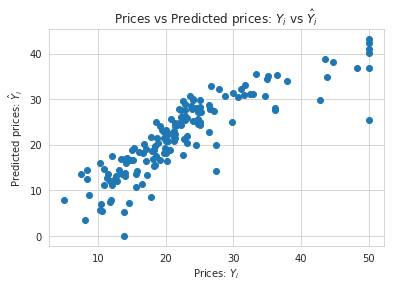

In [120]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

#### Error Distribution

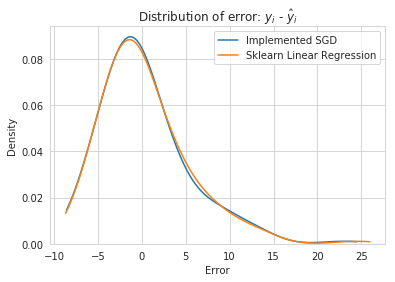

In [122]:
delta_y = y_test - y_pred;
sns.set_style('whitegrid')
sns.kdeplot(delta_y_SGD, label = "Implemented SGD", bw = 0.5)
sns.kdeplot(delta_y, label = "Sklearn Linear Regression", bw = 0.5)
plt.title("Distribution of error: $y_i$ - $\hat{y}_i$")
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Prediction Distribution

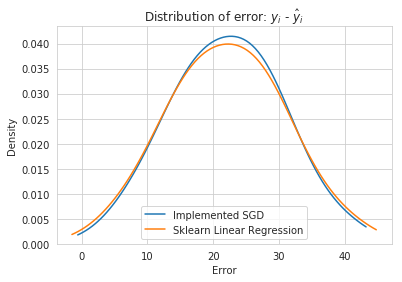

In [123]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred_SGD).reshape(152,), label = "Implemented SGD", bw = 0.5)
sns.kdeplot(np.array(y_pred).reshape(152,), label = "Sklearn Linear Regression", bw = 0.5)
plt.title("Distribution of error: $y_i$ - $\hat{y}_i$")
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Mean Square Error

In [124]:
# The mean squared error
print("Mean squared error Linear Regression with sklearn: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean squared error for manual SGD implementation : %.2f" % mse(y_test,np.array(y_pred_SGD).reshape(152,)))

Mean squared error Linear Regression with sklearn: 23.97
Mean squared error for manual SGD implementation : 23.73


 * Observation(s):
     - From the graph we can interpret that implemented SGD and Sklearn's implemented models are giving approximately similar results.
     - The mean squared error for implemented SGD is nearly same as sklearn implementation. 
     

#### Conclusion

In [128]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "MSE"]
x.add_row(["Linear Regression With Sklearn", 23.97])
x.add_row(["Custom Implementation of SGD", 23.73])
print(x)

+--------------------------------+-------+
|             Model              |  MSE  |
+--------------------------------+-------+
| Linear Regression With Sklearn | 23.97 |
|  Custom Implementation of SGD  | 23.73 |
+--------------------------------+-------+
